In [173]:
import networkx as nx
import seaborn as sns
import numpy as np
from numpy import inf

In [179]:
from os.path import join, abspath, dirname

path = join('.', '..', 'tests/out/graph.gexf')
G = nx.read_gexf(path)

array([[  0.  , 204.56, 204.56, ..., 492.33, 394.09, 410.45],
       [506.15,   0.  , 526.58, ..., 489.39, 391.15, 322.02],
       [390.02, 410.45,   0.  , ..., 373.26, 275.02, 205.89],
       ...,
       [654.25, 349.72, 349.72, ...,   0.  , 539.25, 555.61],
       [115.  , 269.56, 269.56, ..., 557.33,   0.  , 475.45],
       [594.58, 204.56, 204.56, ..., 577.82, 479.58,   0.  ]])

In [184]:
nodelist = list(G.nodes())
matrix = np.array(nx.floyd_warshall_numpy(G, nodelist=nodelist, weight='weight'))
matrix

array([[  0.  , 204.56, 204.56, ..., 492.33, 394.09, 410.45],
       [506.15,   0.  , 526.58, ..., 489.39, 391.15, 322.02],
       [390.02, 410.45,   0.  , ..., 373.26, 275.02, 205.89],
       ...,
       [654.25, 349.72, 349.72, ...,   0.  , 539.25, 555.61],
       [115.  , 269.56, 269.56, ..., 557.33,   0.  , 475.45],
       [594.58, 204.56, 204.56, ..., 577.82, 479.58,   0.  ]])

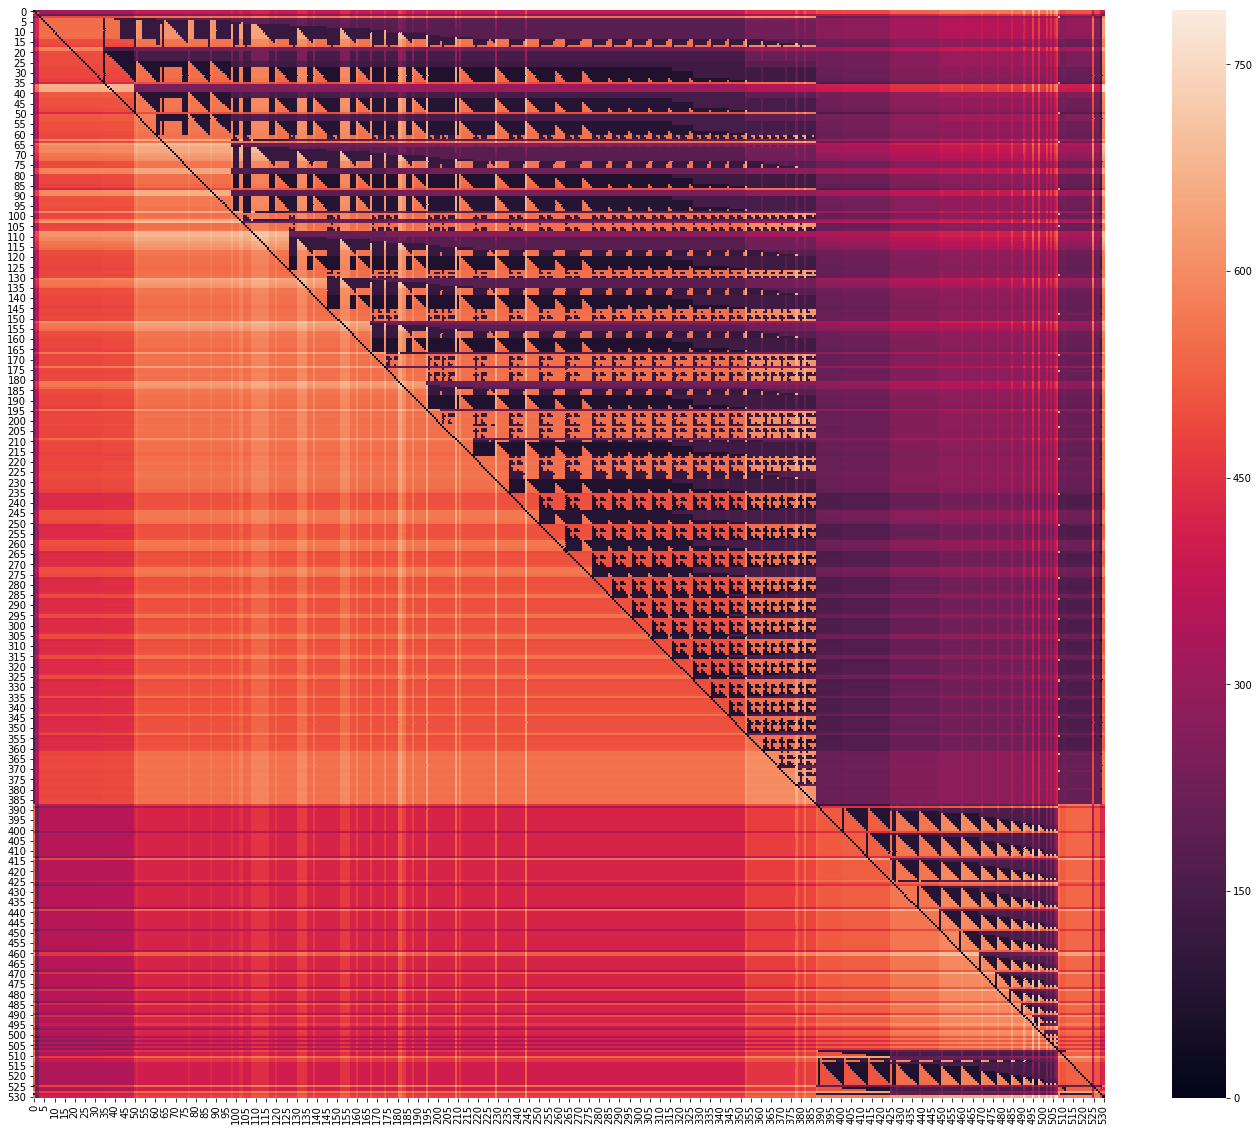

In [175]:
import pylab as plt

plot_matrix = matrix.copy()
plot_matrix[plot_matrix == inf] = 10000
plot_matrix = np.nan_to_num(plot_matrix)

fig = plt.figure(figsize=(24,20))
ax = fig.gca()
step = 1
sns.heatmap(plot_matrix[::step, ::step], ax=ax)

In [176]:
import numpy as np

cycles = []
paths = []
for i, _ in enumerate(matrix):
    for j, _ in enumerate(matrix[i]):
        a = matrix[i, j]
        b = matrix[j, i]
        if i == j:
            continue

        anode = nodelist[i]
        bnode = nodelist[j]
        if a != np.inf:
            paths.append((anode, bnode, a))
        if b != np.inf:
            paths.append((bnode, anode, b))
        if a != np.inf and b != np.inf:
            cycles.append((anode, bnode, a, b, a + b))


cycles = sorted(cycles, key=lambda c: c[-1])
print("Cycles: {}".format(len(cycles)))
print("Paths: {}".format(len(paths)))

Cycles: 281430
Paths: 562860


In [177]:
for c in cycles[:10]:
    print(c)

("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 4219, 1, 'PCR_PRODUCT')", 205.89, 204.56, 410.45)
("(5947, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 204.56, 205.89, 410.45)
("(6006, 9408, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 155.96, 279.09000000000003, 435.05000000000007)
("(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(6006, 9408, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 279.09000000000003, 155.96, 435.05000000000007)
("(6006, 9408, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(128, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 162.96, 279.09000000000003, 442.05000000000007)
("(128, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(6006, 9408, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 279.09000000000003, 162.96, 442.05000000000007)
("(6006, 9408, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(132, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 163.24, 279.09000000000003, 442.33000000000004)
("(132, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(6006, 9408, 1

In [178]:
from more_itertools import pairwise

for c in cycles[:20]:
    print(c)
    path1 = nx.shortest_path(G, c[0], c[1], weight='weight')
    path2 = nx.shortest_path(G, c[1], c[0], weight='weight')
    path = path1 + path2[1:]
    for n1, n2 in pairwise(path):
        edata = G[n1][n2]
        print('{} {} {} > {}'.format(edata['weight'], edata['name'], n1, n2))
    print()

("(4227, 5920, 1, 'PCR_PRODUCT')", "(5947, 4219, 1, 'PCR_PRODUCT')", 205.89, 204.56, 410.45)
205.89 synthesis (4227, 5920, 1, 'PCR_PRODUCT') > (5947, 4219, 1, 'PCR_PRODUCT')
204.56 synthesis (5947, 4219, 1, 'PCR_PRODUCT') > (4227, 5920, 1, 'PCR_PRODUCT')

("(5947, 4219, 1, 'PCR_PRODUCT')", "(4227, 5920, 1, 'PCR_PRODUCT')", 204.56, 205.89, 410.45)
204.56 synthesis (5947, 4219, 1, 'PCR_PRODUCT') > (4227, 5920, 1, 'PCR_PRODUCT')
205.89 synthesis (4227, 5920, 1, 'PCR_PRODUCT') > (5947, 4219, 1, 'PCR_PRODUCT')

("(6006, 9408, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", 155.96, 279.09000000000003, 435.05000000000007)
155.96 synthesis (6006, 9408, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER') > (28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')
279.09000000000003 synthesis (28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER') > (6006, 9408, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')

("(28, 4219, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')", "(6006, 9408, 1, 'PCR_PRODUCT_WITH_LEFT_PRIMER')",

In [171]:
for n in list(G.nodes())[:100]:
    print(n)

(0, 4219, 1, 'PCR_PRODUCT')
(4227, 4261, 1, 'PCR_PRODUCT')
(4227, 5920, 1, 'PCR_PRODUCT')
(5947, 9408, 1, 'PCR_PRODUCT')
(5947, 7182, 1, 'PCR_PRODUCT')
(5947, 7297, 1, 'PCR_PRODUCT')
(5947, 7355, 1, 'PCR_PRODUCT')
(5947, 7527, 1, 'PCR_PRODUCT')
(5947, 7528, 1, 'PCR_PRODUCT')
(5947, 7570, 1, 'PCR_PRODUCT')
(5947, 8177, 1, 'PCR_PRODUCT')
(5947, 8248, 1, 'PCR_PRODUCT')
(5947, 8325, 1, 'PCR_PRODUCT')
(5947, 8508, 1, 'PCR_PRODUCT')
(5947, 9210, 1, 'PCR_PRODUCT')
(5947, 9224, 1, 'PCR_PRODUCT')
(5947, 9255, 1, 'PCR_PRODUCT')
(5947, 9407, 1, 'PCR_PRODUCT')
(5947, 5980, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6002, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6041, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6082, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6106, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6246, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 6268, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 7205, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(5947, 7219, 1, 'PCR_PRODUCT_WITH_RIGHT_PRIMER')
(594